# EJEMPLO DE USO DE PANDAS PARA EL PREPROCESAMIENTO
## ¿Qué aprenderás?
1. Sabrás usar pandas cuando te destinen un conjunto grande de datos
2. Podrás transformar y preparar un conjunto de datos para analisis o entrenamiento de IA
3. Aprenderás a usar herramientas que te ayudarán no solo con cualquier conjunto
4. Irás preparado en caso de que quieras formarte en IA y BigData

### Carga de librerías

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

### Carga del dataset 
El dataset que se empleará será el dataset del titanic, detalla la información de los que sobrevivieron dy no sobrevivieron a la tragedia del titanic, se detalla que hay errores en la recogida de datos por lo que algunos datos son imprecisos, este dataset será enviado a entrenar a un modelo de IA para predecir cuantas víctimas habrá si ocurre otro accidente de esta magnitud

In [117]:
titanic = pd.read_csv("titanic_dataset.csv")

## PRIMER PASO: PRIMERA VISTA DE LOS CAMPOS E INFORMACIÓN DEL DATASET

In [118]:
# miramos el nombre de los campos y echamos una primera vista a como están formados
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# observamos la descripcion de los campos del dataset
titanic.describe() # este metodo es esencial porque podremos observar si hay nulos en los campos cuantitativos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
# observamos la información de los campos del dataset
titanic.info() # este metodo es esencial para observar los tipos de todos los campos y si hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observamos que los campos Age,Cabin y Embarked poseen valores nulos, de aquí podemos sacar varias estrategias:
1. El campo cabin posee solo 204 valores, los demás son nulos por lo que se eliminará la columna ya que es inservible para lo que buscamos
2. El campo Age tiene 714 valores rellenos es cuantitativo, al ser errores de metricas para suavizarlos se imputará con la mediana
3. El campo Embarked tiene 889 valores rellenos es cualitativo, por lo que se imputara por la moda

Echando este vistazo ya tenemos los nulos preparados para aplicar las estrategias mencionadas

## SEGUNDO PASO: VISUALIZACIÓN DE LOS DATOS
Para este paso usaré las siguientes gráficas:
1. Histograma: Nos permite el visualizado de los campos cuantitativos permitiendonos ver los outliers
2. Gráfico de barras: Para los campos cualitativos comprobar si hay mucha dispersión o no
3. Gráfico en 2D: Comprobar cuales son los campos más independientes

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

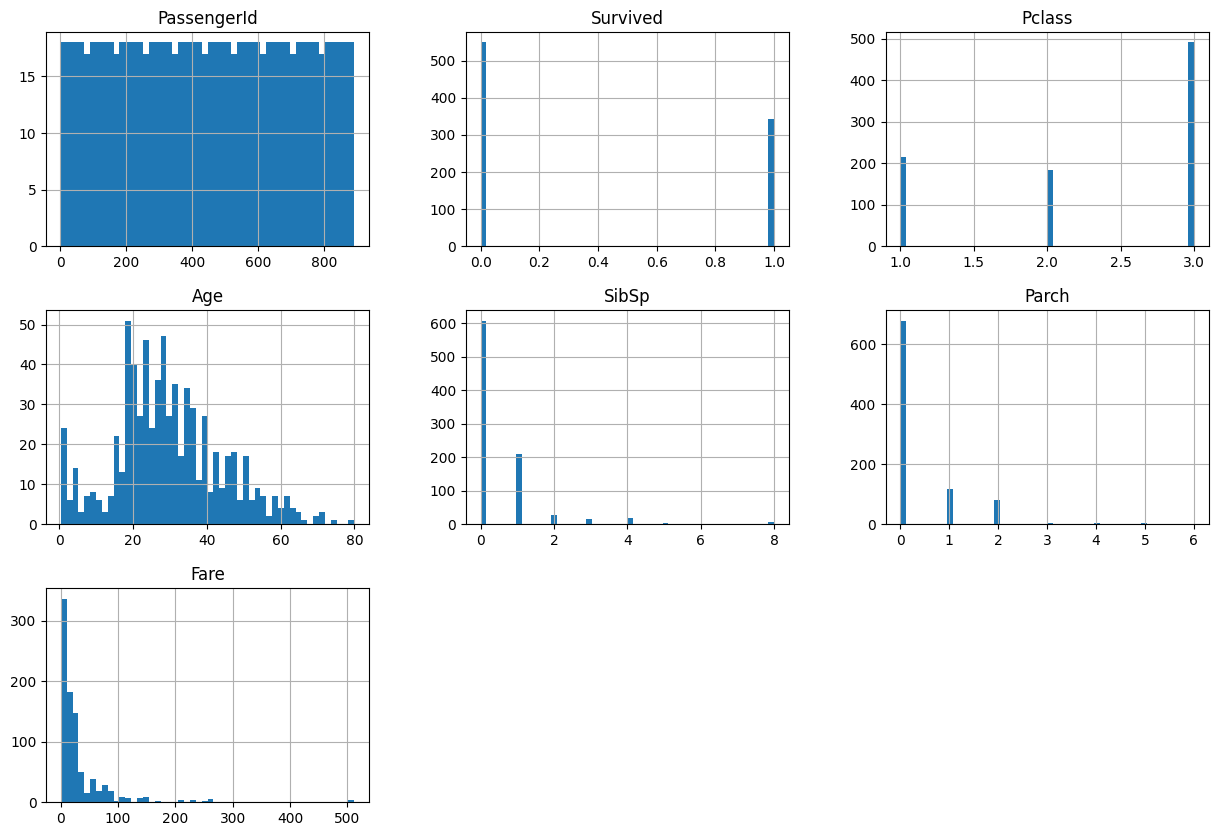

In [121]:
# HISTOGRAMA
titanic.hist(bins=50,figsize=(15,10))

En el histograma observamos que el campo PassengerID son ID's únicos que nos fastidiaran el análisis por lo que tendremos que borrar ese campo e identificar a los pasajeros de otra forma, comprobamos que en el campo Age y Fare hay outliers muy severos

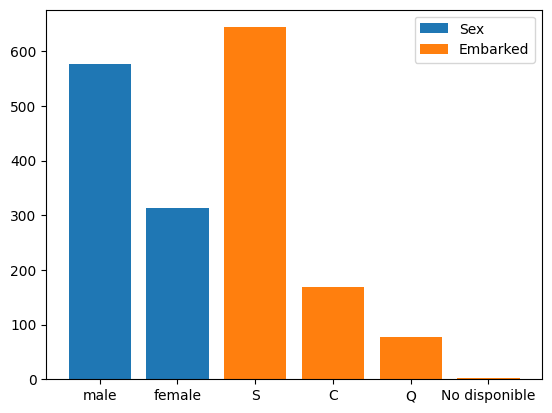

In [122]:
plt.bar(titanic["Sex"].unique(),titanic["Sex"].value_counts()).set_label("Sex")
embarcacion = titanic["Embarked"].fillna("No disponible") # medida temporal para visualizar los datos
plt.bar(embarcacion.unique(),embarcacion.value_counts()).set_label("Embarked")
plt.legend()
plt.show()

Desde esta gráfica podemos comprobar que todo está correcto, hay una pequeña variacion en la clase S de Embarked pero no afectará al conjunto ya que osn categoricas

C:\Users\peibo\AppData\Local\Temp\ipykernel_1296\269013001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bidimension["Age"] = bidimension["Age"].fillna(0) # solucion temporal para el visualizado de datos


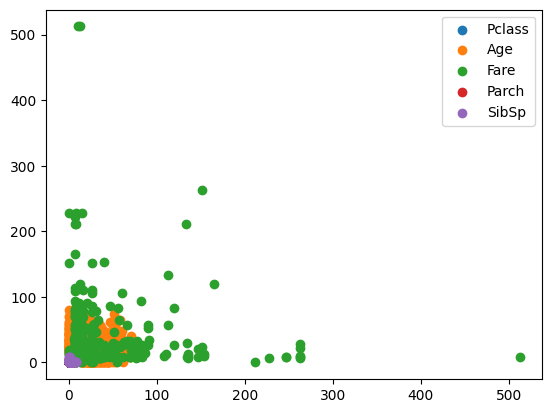

In [123]:
bidimension = titanic.get(["Pclass","Age","Fare","Parch","SibSp"]) # obtenemos las columnas numericas 
bidimension["Age"] = bidimension["Age"].fillna(0) # solucion temporal para el visualizado de datos
for column in bidimension.columns:
    serie = bidimension[column]
    x = [] # valor x de la columna
    y = [] # valor y de la columna
    for ind,value in enumerate(serie):
        if(ind<len(serie)//2):
            x.append(value)
        else:
            y.append(value)
    y.pop(len(y)-1) # el conjunto es impar por lo que se borra un elemento de y para que los conjuntos sean de la misma longitud
    plt.scatter(x,y).set_label(column)
plt.legend()
plt.show()
        


Observamos que la variable Fare es la que mas se dispersa del conjunto por lo que indica que es independiente en el estudio de correlación final se comprobará finalmente

## TERCER PASO: DETECCION DE NULOS Y RECUPERACION DE VALORES

In [124]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sabemos que el campo cabin es el que más nulos tiene, por lo que la recuperación de sus valores será complicada y establecerle un valor por defecto no cambiaría nada por lo que se eliminará

In [125]:
titanic = titanic.drop(columns=["Cabin"])

Para la edad aplicaremos una imputacion siguiendo la estrategia de la mediana para recuperar esos valores

In [126]:
imputer_age = SimpleImputer(strategy="median") # colocamos la estrategia como mediana
serie_age = titanic["Age"].to_numpy()
serie_age = serie_age[:,np.newaxis] # el imputer requiere de una matriz, esta sentencia hace que nuestro array de una dimension pase a ser de dos
imputer_age.fit(serie_age) # fit sirve para ajustar los datos y que el imputer sepa cual es la mediana, además recoge las posiciones de los nulos
serie_age = imputer_age.transform(serie_age) # transform sirve para que el imputer cambie las posiciones nulas por la mediana
titanic["Age"] = serie_age
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Ahora toca el campo embarked que tomará otro método pero con la estrategia de la moda

In [127]:
serie_embarked = titanic["Embarked"]
values = serie_embarked.value_counts().sort_values(ascending=False) # obtenemos el numero de valores de mayor a menor
print(f"El valor que mas se repite es {values.index[0]}\n")
titanic["Embarked"] = serie_embarked.fillna(values.index[0]) # reemplazamos los valores nulos por el valor que más se repite
titanic.info()

El valor que mas se repite es S

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## CUARTO PASO: DETECCION DE OUTLIERS
Existen varios metodos para detectar outliers pero en este caso utilizaremos el método **Rango intercuantil**
Los posibles outliers se encuentran en los campos:
1. Age
2. Fare

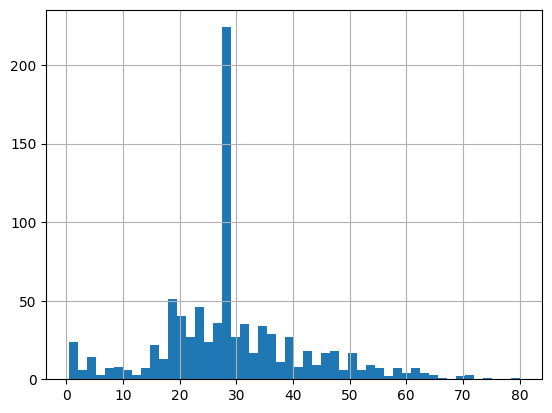

Media de la edad con outliers 29.36158249158249


In [128]:
serie_age = titanic["Age"]
serie_age.hist(bins=50)
plt.show()
print(f"Media de la edad con outliers {serie_age.mean()}")

In [129]:
K = 1.5
q1 = np.quantile(serie_age,0.25)
q3 = np.quantile(serie_age,0.75)
IQR = q3-q1
xl = q1 - K*IQR
xu = q3 + K*IQR

serie_age = np.sort(serie_age)
for ind,value in enumerate(serie_age):
    if(value<xl or value>xu):
        print(f"Outlier con valor {value} en la posicion {ind}")

for ind,value in enumerate(serie_age):
    if(value<2):
        serie_age[ind] = 2
    else:
        serie_age[ind] = serie_age[ind]//1



Outlier con valor 0.42 en la posicion 0
Outlier con valor 0.67 en la posicion 1
Outlier con valor 0.75 en la posicion 2
Outlier con valor 0.75 en la posicion 3
Outlier con valor 0.83 en la posicion 4
Outlier con valor 0.83 en la posicion 5
Outlier con valor 0.92 en la posicion 6
Outlier con valor 1.0 en la posicion 7
Outlier con valor 1.0 en la posicion 8
Outlier con valor 1.0 en la posicion 9
Outlier con valor 1.0 en la posicion 10
Outlier con valor 1.0 en la posicion 11
Outlier con valor 1.0 en la posicion 12
Outlier con valor 1.0 en la posicion 13
Outlier con valor 2.0 en la posicion 14
Outlier con valor 2.0 en la posicion 15
Outlier con valor 2.0 en la posicion 16
Outlier con valor 2.0 en la posicion 17
Outlier con valor 2.0 en la posicion 18
Outlier con valor 2.0 en la posicion 19
Outlier con valor 2.0 en la posicion 20
Outlier con valor 2.0 en la posicion 21
Outlier con valor 2.0 en la posicion 22
Outlier con valor 2.0 en la posicion 23
Outlier con valor 55.0 en la posicion 849
O

Para el caso de Fare lo veremos visualmente en un diagrama llamado diagrama de cajas y bigotes que nos muestra que tan severos son los outliers

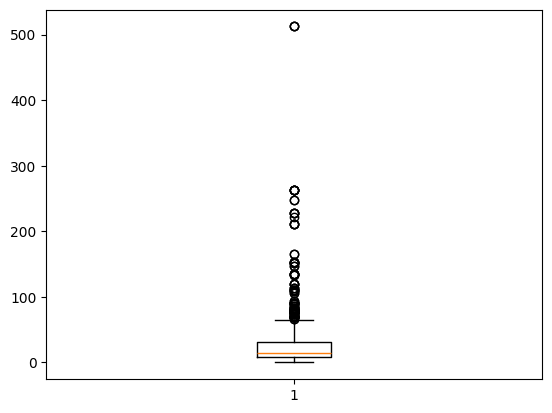

In [130]:
serie_fare = titanic["Fare"]
plt.boxplot(serie_fare)
plt.show()

<Axes: >

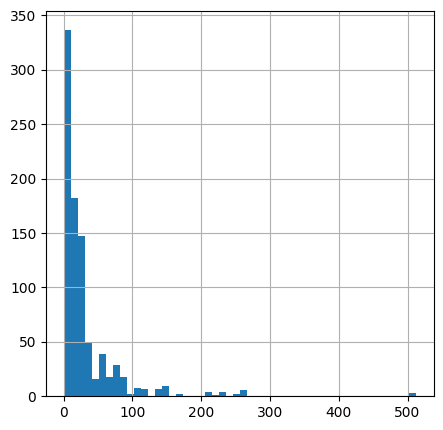

In [131]:
serie_fare.hist(bins=50,figsize=(5,5))

## QUINTO PASO: TRANSFORMAACION DE DATOS
En este paso se procederá a la eliminacion de campos, transformacion de categorias y escalamiento de datos

Primero eliminaremos los campos inservibles

In [132]:
titanic = titanic.drop(columns=["PassengerId","Name","Ticket"])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


A partir de aqui se transformaran los campos categoricos Sex y Embarked a numéricos cada uno se hará de una forma distinta
1. Transformacion de Embarked a numero mediante OrdinalEncoder
Comprobamos que el campo Embarked es la clase de la persona que se sube al barco, por lo que muestra un valor ordinal siendo S la clase más alta y Q la más baja

In [133]:
ord_encoder = OrdinalEncoder(categories=[["Q","C","S"]]) # se ordenan de peor a mejor IMPORTANTE DEBE DE SER DE DOS DIMENSIONES [[]]
datos = titanic["Embarked"].to_numpy()
datos = datos[:,np.newaxis]
ord_encoder.fit(datos)
titanic["Embarked"] = ord_encoder.transform(datos)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,2.0
3,1,1,female,35.0,1,0,53.1000,2.0
4,0,3,male,35.0,0,0,8.0500,2.0


2. Transformacion de Sex a categoria mediante OneHotEncoder

In [134]:
hot_encoder = OneHotEncoder()
datos = titanic["Sex"].to_numpy()
datos = datos[:,np.newaxis]
hot_encoder.fit(datos)
datos = hot_encoder.transform(datos).toarray() # se ha de poner un array ya que originalmente se devuelve una matriz
print(f"Columnas que guarda OneHotEncoder {hot_encoder.get_feature_names_out(["Sex"])}")
titanic = titanic.drop(columns=["Sex"])
new_columns = pd.DataFrame(data=datos,columns=hot_encoder.get_feature_names_out(["Sex"]))
titanic = pd.concat([titanic,new_columns],axis=1) # se concatenan horizontalmente los DataFrames para añadir las nuevas columnas
titanic.head()

Columnas que guarda OneHotEncoder ['Sex_female' 'Sex_male']


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,2.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,2.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,2.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,2.0,0.0,1.0


## QUINTO PASO: ESTUDIO DE CORRELACION
Este paso demuestra que campos son los que son independientes y por lo tanto son los que se borraran
**IMPORTANTE**
Todas los campos han de ser numéricos ya que si no el estudio falla

<Axes: >

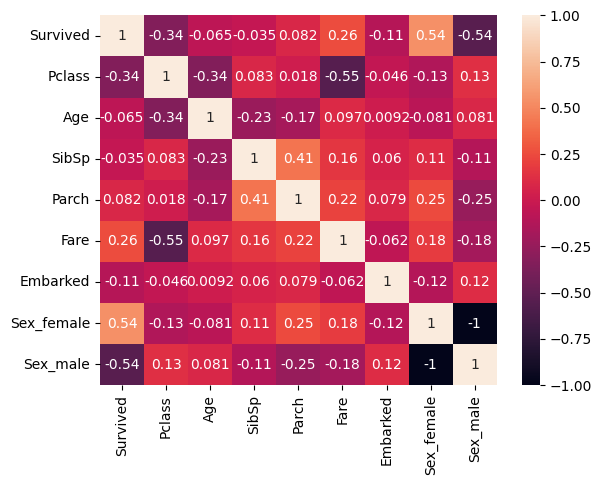

In [135]:
sb.heatmap(titanic.corr(method="pearson"),annot=True) # primero se mira el campo survived ya que es el objetivo, luego se miran los demás

Comprobamos que sobre survived los campos Parch,SibSp y Age son los más independientes, más observaciones:
1. El campo Age es el más independiente ya que salvo con 3 campos ni sube ni baja conforme cambian los datos
2. SibSp aunque es independiente en el objetivo observamos que en los demás muestra una relación fuerte
3. Lo mismo pasa con el campo Parch
4. Embarked junto con Age son los más independientes
Los campos Age y Embarked serán eliminados

In [136]:
titanic = titanic.drop(columns=["Age","Embarked"])
titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,1,0,7.2500,0.0,1.0
1,1,1,1,0,71.2833,1.0,0.0
2,1,3,0,0,7.9250,1.0,0.0
3,1,1,1,0,53.1000,1.0,0.0
4,0,3,0,0,8.0500,0.0,1.0


# ULTIMO PASO: ESCALAMIENTO DE DATOS
El escalamiento se basa en transformar todos los campos en una misma medida, esto se utiliza para facilitar la deteccion de patrones o entrenar modelos de IA

In [137]:
# observamos los campos que vamos a escalar
titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,1,0,7.2500,0.0,1.0
1,1,1,1,0,71.2833,1.0,0.0
2,1,3,0,0,7.9250,1.0,0.0
3,1,1,1,0,53.1000,1.0,0.0
4,0,3,0,0,8.0500,0.0,1.0


Nos interesa escalar los campos Pclass SibSp Parch y Fare ya que Sex_female y Sex_male tienen valores de 0 y 1 que el sistema entiende

In [138]:
# excluimos el campo objetivo del DataFrame
survivors = titanic["Survived"]
campos_scaler = titanic.get(["Pclass","SibSp","Parch","Fare"])
# instancia de la clase que escalar
ss_scaler = StandardScaler()

ss_scaler.fit(campos_scaler) # ajustamos los campos para que el escalador entienda como los debe escalar
campos_scaler = ss_scaler.transform(campos_scaler) # transformamos los datos

# operamos con los DataFrames para transformar el DataFrame principa a lo que queremos
campos_scaler = pd.DataFrame(data=campos_scaler,columns=["Pclass","SibSp","Parch","Fare"]) 
titanic = titanic.drop(columns=["Pclass","SibSp","Parch","Fare"])
titanic = pd.concat([campos_scaler,titanic],axis=1)
titanic.head()


,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male
0,0.827377,0.432793,-0.473674,-0.502445,0,0.0,1.0
1,-1.566107,0.432793,-0.473674,0.786845,1,1.0,0.0
2,0.827377,-0.474545,-0.473674,-0.488854,1,1.0,0.0
3,-1.566107,0.432793,-0.473674,0.420730,1,1.0,0.0
4,0.827377,-0.474545,-0.473674,-0.486337,0,0.0,1.0


Una vez escalados los datos los visualizaremos para ver como cambian los resultados

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Sex_female'}>],
       [<Axes: title={'center': 'Sex_male'}>, <Axes: >, <Axes: >]],
      dtype=object)

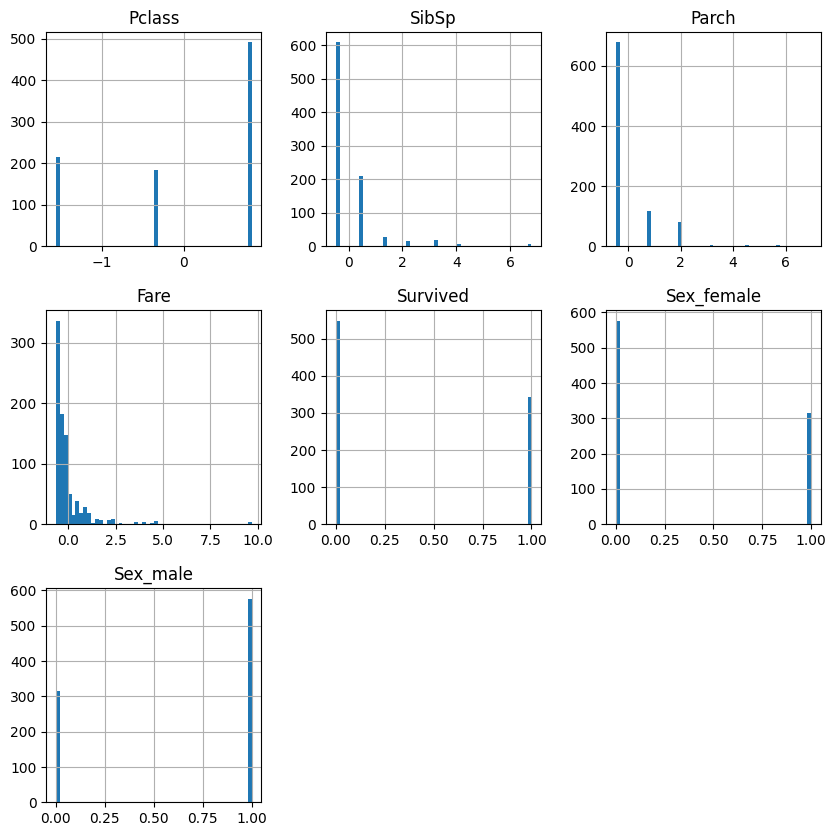

In [139]:
titanic.hist(bins=50,figsize=(10,10))